# Linear Boundaries

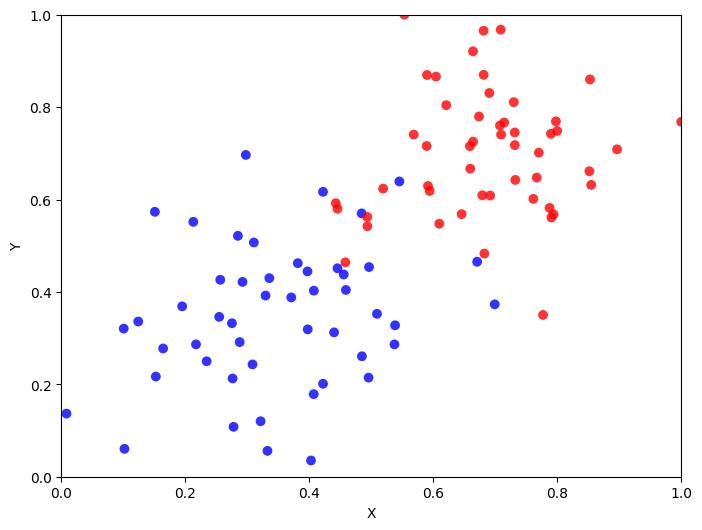

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]  # First two columns are x and y coordinates
y = data[:, 2]   # Third column is the label

# Separate data by class
class_1 = X[y == 1]
class_0 = X[y == 0]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', s=50, alpha=0.8, edgecolors='none')
plt.scatter(class_0[:, 0], class_0[:, 1], c='red', s=50, alpha=0.8, edgecolors='none')
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(False)
plt.show()

In [6]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


# 3 or More Labels

## Softmax Algorithm

In [7]:
import numpy as np

def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result
    
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())

L = np.array([5.0, 6.0, 7.0])
print (softmax(L))

[np.float64(0.09003057317038046), np.float64(0.24472847105479764), np.float64(0.6652409557748219)]


## Cross Entropy

cross entropy for 2 classes

In [9]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float64(Y)
    P = np.float64(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

Y = [1,0,1,1]
P = [0.4,0.6,0.1,0.5]
print(cross_entropy(Y, P))

4.828313737302301


cross entropy for 3 or more classes

$$
\text{Cross-Entropy} = -\sum_{i=1}^{n} \sum_{j=1}^{m} y_{ij} \ln(p_{ij})
$$

## Linear Regression

$$
\text{Error Function} = -\frac{1}{m} \sum_{i=1}^{m} (1-y_i)\ln(1-\hat{y}_i) + y_i\ln(\hat{y}_i)
$$

for sigmoid function:

$$
E(W,b) = -\frac{1}{m} \sum_{i=1}^{m} (1-y_i)\ln(1-\sigma(Wx^{(i)}+b)) + y_i\ln(\sigma(Wx^{(i)}+b))
$$

## Gradient Descent

What we do on Gradient Descent

$$
\hat{y} = \sigma(Wx+b) \quad \text{← Bad}
$$

$$
\hat{y} = \sigma(w_1x_1 + \ldots + w_nx_n + b)
$$

$$
\nabla E = \left(\frac{\partial E}{\partial w_1}, \ldots, \frac{\partial E}{\partial w_n}, \frac{\partial E}{\partial b}\right)
$$

$$
\alpha = 0.1 \quad \text{(learning rate)}
$$

$$
w_i' \leftarrow w_i - \alpha \frac{\partial E}{\partial w_i}
$$

$$
b' \leftarrow b - \alpha \frac{\partial E}{\partial b}
$$

$$
\hat{y} = \sigma(W'x+b') \quad \text{← Better}
$$

### Gradietn Calculation

The first thing to notice is that the sigmoid function has a really nice derivative. Namely,
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

And now, let's recall that if we have $m$ points labelled $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$, the error formula is:

$$
E = -\frac{1}{m} \sum_{i=1}^{m} (y_i \ln(\hat{y}_i) + (1 - y_i) \ln(1 - \hat{y}_i))
$$

where the prediction is given by $\hat{y}_i = \sigma(Wx^{(i)} + b)$.

Our goal is to calculate the gradient of $E$, at a point $x = (x_1, \ldots, x_n)$, given by the partial derivatives

$$
\nabla E = \left(\frac{\partial}{\partial w_1} E, \cdots, \frac{\partial}{\partial w_n} E, \frac{\partial}{\partial b} E\right)
$$

To simplify our calculations, we'll actually think of the error that each point produces, and calculate the derivative of this error. The total error, then, is the average of the errors at all the points. The error produced by each point is, simply,

$$
E = -y \ln(\hat{y}) - (1 - y) \ln(1 - \hat{y})
$$

In order to calculate the derivative of this error with respect to the weights, we'll first calculate $\frac{\partial}{\partial w_j} \hat{y}$. Recall that $\hat{y} = \sigma(Wx + b)$, so:

$$
\begin{align}
\frac{\partial}{\partial w_j} \hat{y} &= \frac{\partial}{\partial w_j} \sigma(Wx + b) \\
&= \sigma(Wx + b)(1 - \sigma(Wx + b)) \cdot \frac{\partial}{\partial w_j}(Wx + b) \\
&= \hat{y}(1 - \hat{y}) \cdot \frac{\partial}{\partial w_j}(Wx + b) \\
&= \hat{y}(1 - \hat{y}) \cdot \frac{\partial}{\partial w_j}(w_1x_1 + \cdots + w_jx_j + \cdots + w_nx_n + b) \\
&= \hat{y}(1 - \hat{y}) \cdot x_j
\end{align}
$$

The last equality is because the only term in the sum which is not a constant with respect to $w_j$ is precisely $w_jx_j$, which clearly has derivative $x_j$.

Now, we can go ahead and calculate the derivative of the error $E$ at a point $x$, with respect to the weight $w_j$.

$$
\begin{align}
\frac{\partial}{\partial w_j} E &= \frac{\partial}{\partial w_j} [-y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})] \\
&= -y \frac{\partial}{\partial w_j} \log(\hat{y}) - (1 - y) \frac{\partial}{\partial w_j} \log(1 - \hat{y}) \\
&= -y \cdot \frac{1}{\hat{y}} \cdot \frac{\partial}{\partial w_j} \hat{y} - (1 - y) \cdot \frac{1}{1-\hat{y}} \cdot \frac{\partial}{\partial w_j} (1 - \hat{y}) \\
&= -y \cdot \frac{1}{\hat{y}} \cdot \hat{y}(1 - \hat{y})x_j - (1 - y) \cdot \frac{1}{1-\hat{y}} \cdot (-1)\hat{y}(1 - \hat{y})x_j \\
&= -y(1 - \hat{y}) \cdot x_j + (1 - y)\hat{y} \cdot x_j \\
&= -(y - \hat{y})x_j
\end{align}
$$

A similar calculation will show us that

$$
\frac{\partial}{\partial b} E = -(y - \hat{y})
$$

This actually tells us something very important. For a point with coordinates $(x_1, \ldots, x_n)$, label $y$, and prediction $\hat{y}$, the gradient of the error function at that point is $(-(y - \hat{y})x_1, \cdots, -(y - \hat{y})x_n, -(y - \hat{y}))$. In summary, the gradient is

$$
\nabla E = -(y - \hat{y})(x_1, \ldots, x_n, 1).
$$

If you think about it, this is fascinating. The gradient is actually a scalar times the coordinates of the point! And what is the scalar? Nothing less than a multiple of the difference between the label and the prediction. What significance does this have?

So, a small gradient means we'll change our coordinates by a little bit, and a large gradient means we'll change our coordinates by a lot.

If this sounds anything like the perceptron algorithm, this is no coincidence! We'll see it in a bit.

### Gradient Descent Step

Therefore, since the gradient descent step simply consists in subtracting a multiple of the gradient of the error function at every point, then this updates the weights in the following way:

$$
w_i' \leftarrow w_i - \alpha[-(y - \hat{y})x_i],
$$

which is equivalent to

$$
w_i' \leftarrow w_i + \alpha(y - \hat{y})x_i.
$$

Similarly, it updates the bias in the following way:

$$
b' \leftarrow b + \alpha(y - \hat{y}),
$$

*Note:* Since we've taken the average of the errors, the term we are adding should be $\frac{1}{m} \cdot \alpha$ instead of $\alpha$, but as $\alpha$ is a constant, then in order to simplify calculations, we'll just take $\frac{1}{m} \cdot \alpha$ to be our learning rate, and abuse the notation by just calling it $\alpha$.

## Gradient Descent Algorithm

**Gradient Descent Algorithm:**

1. Start with random weights: $w_1, \ldots, w_n, b$

2. For every point $(x_1, \ldots, x_n)$:
   
   2.1. For $i = 1, \ldots, n$
   
      2.1.1. Update $w_i' \leftarrow w_i - \alpha(\hat{y} - y)x_i$
      
      2.1.2. Update $b' \leftarrow b - \alpha(\hat{y} - y)$

3. Repeat until error is small